## Logica Fuzzy
-Variáveis de Entrada: 
  Temperatura: 0<=t<=37 / Humidade: 0<=h<=100

-Variável de Saída:
  Potência Ar Condicionado: 0<=p<=100

In [68]:
!pip install scikit-fuzzy

In [69]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Antecedent

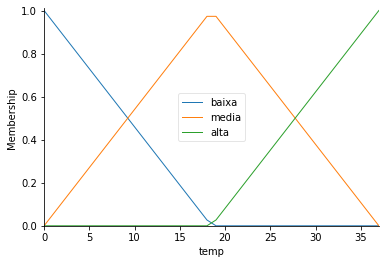

In [70]:
temp = ctrl.Antecedent(np.arange(0, 38, 1), "temp")
temp.automf(3, names=["baixa", "media", "alta"])
temp.view()

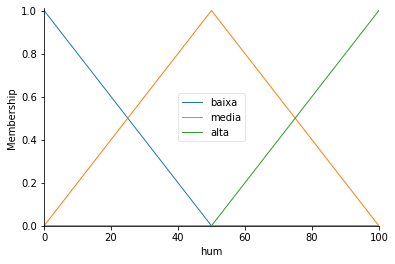

In [71]:
hum = ctrl.Antecedent(np.arange(0, 101, 1), "hum")
hum.automf(3, names=["baixa", "media", "alta"])
hum.view()

### Consequent

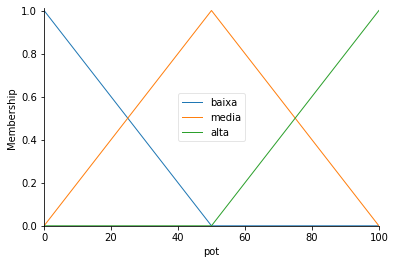

In [72]:
pot = ctrl.Consequent(np.arange(0, 101, 1), "pot")
pot.automf(3, names=["baixa", "media", "alta"])
pot.view()

### Regras


In [73]:
rule1 = ctrl.Rule(temp["baixa"] & hum['baixa'], pot["alta"])
rule2 = ctrl.Rule(temp["baixa"] & hum['media'], pot["alta"])
rule3 = ctrl.Rule(temp["baixa"] & hum['alta'], pot["media"])

rule4 = ctrl.Rule(temp["media"] & hum['baixa'], pot["baixa"])
rule5 = ctrl.Rule(temp["media"] & hum['media'], pot["baixa"])
rule6 = ctrl.Rule(temp["media"] & hum['alta'], pot["media"])

rule7 = ctrl.Rule(temp["alta"] & hum['baixa'], pot["baixa"])
rule8 = ctrl.Rule(temp["alta"] & hum['media'], pot["media"])
rule9 = ctrl.Rule(temp["alta"] & hum['alta'], pot["alta"])

### Sistema

In [74]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

#### temperatura: 20; humidade: 30;

27.37 atm


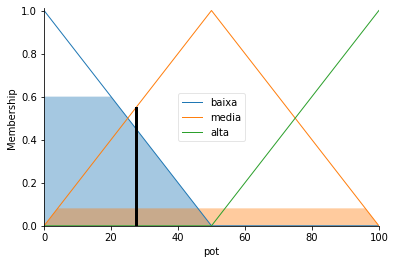

In [75]:
tipping.input["temp"] = 20
tipping.input["hum"] = 30
tipping.compute()

ans = tipping.output["pot"]
print("%.2f atm" %ans)
pot.view(sim=tipping)

#### temperatura: 30; humidade: 15;

38.62 atm


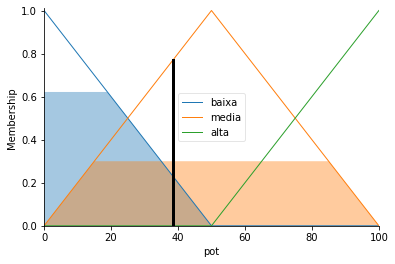

In [76]:
tipping.input["temp"] = 30
tipping.input["hum"] = 15
tipping.compute()

ans = tipping.output["pot"]
print("%.2f atm" %ans)
pot.view(sim=tipping)

#### temperatura: 35; humidade: 30;

46.23 atm


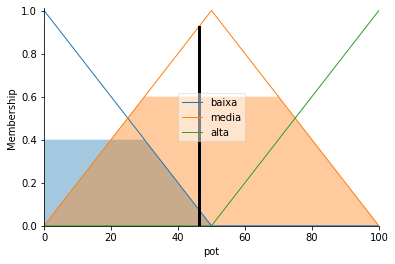

In [77]:
tipping.input["temp"] = 35
tipping.input["hum"] = 30
tipping.compute()

ans = tipping.output["pot"]
print("%.2f atm" %ans)
pot.view(sim=tipping)

#### temperatura: 10; humidade: 70;

48.33 atm


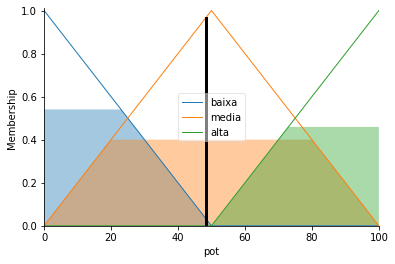

In [78]:
tipping.input["temp"] = 10
tipping.input["hum"] = 70
tipping.compute()

ans = tipping.output["pot"]
print("%.2f atm" %ans)
pot.view(sim=tipping)